In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize



class EinsteinFormula():
    
    def __init__(self , et , name):
        
        self.name = name #name of the element
        self.w = 0 #angular frequency of harmonic oscillator rad/s 
        self.kb = 1.3e-23 #boltzmann constant J/k
        self.ET = et #einstein temperature kelivin
        self.t_s = np.arange(1,2*self.ET,0.1) #temperature series in kelvin - 1- et K with 0.01K increment 
        self.h = 1.054e-34 #plancks constant h-bar
        self.cv = [] #specific heat at constant volume series in J/kg
        self.N = 6.023e23 #avagadros number , number of atoms in 1 mol of a substance
        
    def CalculateW(self):
        
        self.w = self.ET*self.kb/self.h
        self.f = self.w/2*np.pi
        
    def CalculateSH(self):
        
        self.cv = self.kb*self.N*((self.ET/self.t_s)**2)*(np.exp(self.ET/self.t_s)/((np.exp(self.ET/self.t_s))-1)**2)
        self.cp = self.cv + 8.314 #specific heat at constant pressure 
        
    def Plot(self):
        
        self.CalculateW()
        self.CalculateSH()
        #print(self.w)
        #print(self.SpecificHeat)
        plt.figure(figsize=(30,10))
        plt.style.use('ggplot')
        plt.title("Cv over T/ET for {}".format(self.name))
                
        plt.plot(self.t_s/self.ET , self.cv)
        
        
        plt.xlabel("T")
        plt.ylabel("specific heat in J/kg")
        plt.show()
        

f:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in exp
f:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in square
f:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


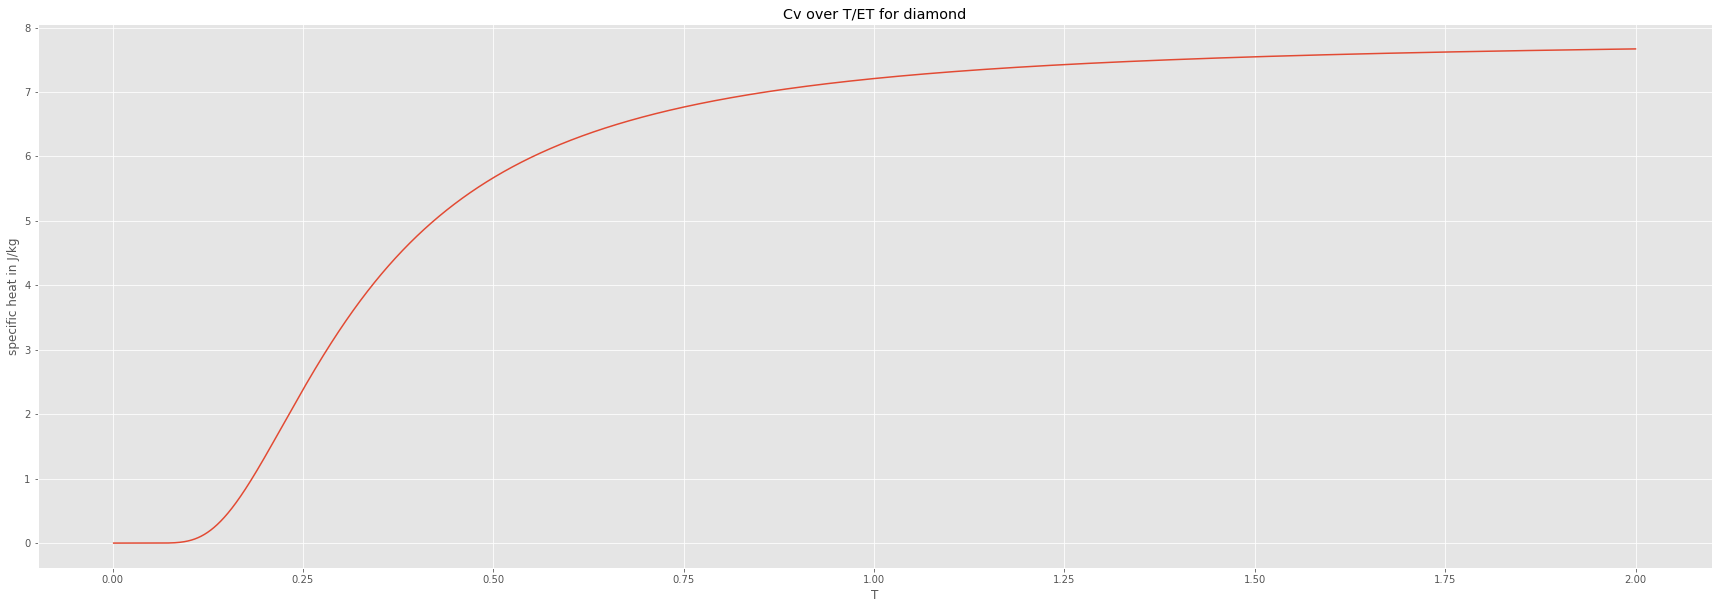

In [12]:
#plotting einstien solid specific heat for diamond 

e = EinsteinFormula(1320, "diamond") #einstien temperature for diamond is 1320K
e.Plot()


In [44]:
from scipy import integrate

class DebyeFormula():
    
    def __init__(self , dt , name):
        
        self.dt = dt #debye temperate in kelvin
        self.w = 0 #debye frequency 
        self.cv = [] #specific heat at constant volume
        self.t_s = np.arange(1 , 10*self.dt , 0.1) #temperature series between 1 , dt with 0.1k incrememt
        self.h = 1.054e-34 #plancks constant h-bar
        self.kb =  1.3e-23 #boltzmann constant J/k
        self.xd  = self.dt/self.t_s
        self.N = 6.023e23 #avagadros number , number of atoms in 1 mol of a substance
        self.name = name
        
    def CalculateW(self):
        
        self.w = self.h*self.dt/self.kb
    
    
    def CalculateSH(self):
        
        self.CalculateW()
        
        func = lambda x: ((x**4)*np.exp(x)/(np.exp(x)-1)**2)
        
        for t in self.t_s:
            
            xd = self.dt/t
            integral_ = integrate.quad(func ,0 , xd)
            cv_ = 9*3*8.314*((1/xd)**3)*integral[0]
            self.cv.append(cv_)
            
    def plot(self):
        
        self.CalculateSH()
        plt.style.use('ggplot')
        plt.figure(figsize=(30,10))
        plt.title("Cv over T/DT for {}".format(self.name))
        plt.xlabel("T/DT")
        plt.ylabel("Cv")
        plt.plot(self.t_s, self.cv)
        plt.show()

f:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp
f:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
f:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in double_scalars
f:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:31: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
f:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:31: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one wil

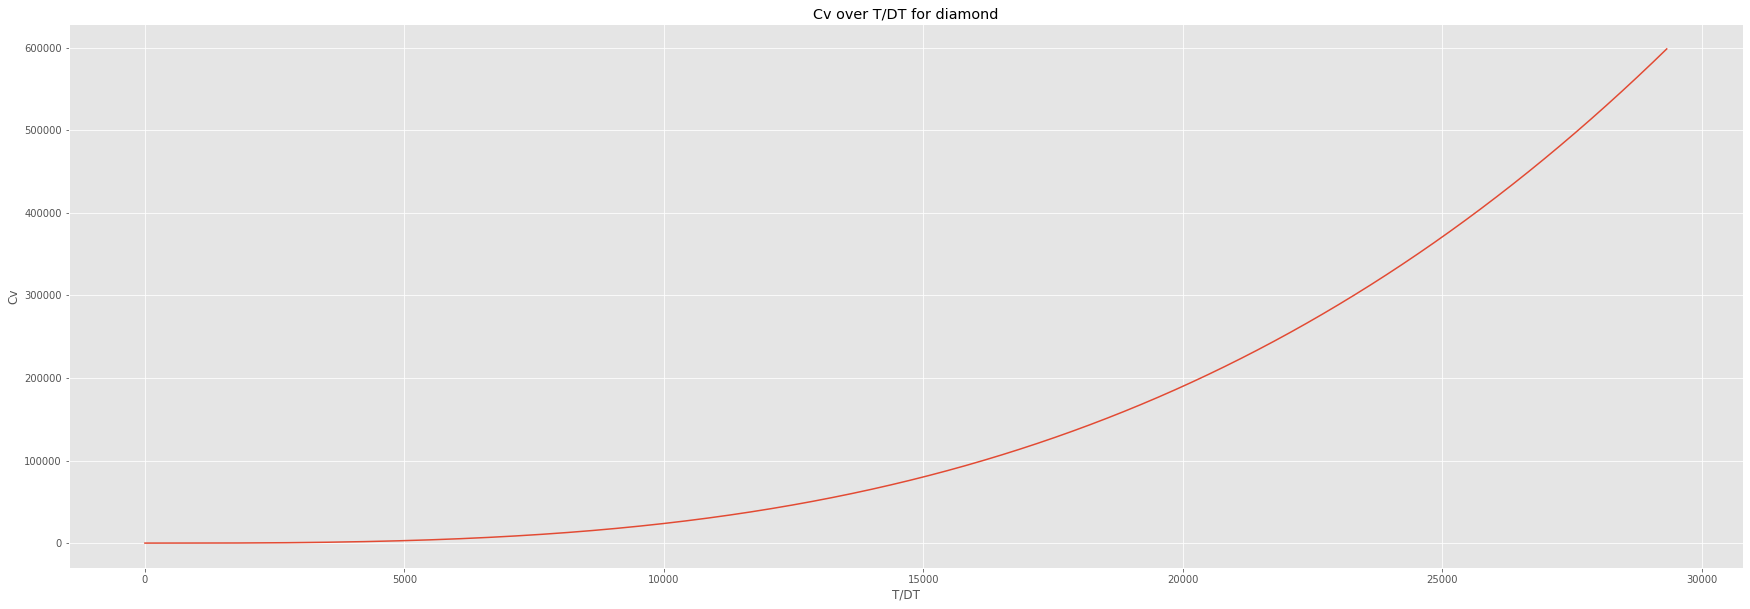

In [45]:
d = DebyeFormula(2933 , "diamond")
d.plot()

In [26]:
#integration test scipy

from scipy import integrate

import numpy as np

func = lambda x: x**2

integral = integrate.quad(func , 0 , 2)
print(integral)

(2.666666666666667, 2.960594732333751e-14)
